# 2017 장애인 실태조사 뇌병변장애 건강관리의사 필요 및 건강수준 향상을 위한 서비스 개선 사항

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 원본 데이터 불러오기
raw_df = pd.read_excel('pydata/2017 장애인실태조사_뇌병변장애.xlsx', sheet_name = 1)
len(raw_df)

# 뇌병변 중 뇌졸중과 뇌손상 불러오기
df = raw_df[(raw_df['주된 진단명(1)']==2) | (raw_df['주된 진단명(1)']==3)]
df.head()

,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보육,교육비","보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p
13,2,2,2,21,NaN,NaN,2,NaN,NaN,2,...,0,0,0,0,0,0,0,110,461.979521,1.176911
15,2,2,1,21,3.0,1.0,2,5.0,NaN,2,...,0,0,0,0,0,0,0,8,493.318225,1.256747
42,2,1,1,21,NaN,NaN,2,NaN,NaN,1,...,0,0,0,0,0,0,0,20,761.982341,1.671569
85,2,1,1,21,NaN,NaN,2,NaN,NaN,1,...,0,0,0,0,10,0,90,240,493.214478,1.081970
118,2,1,88,21,8.0,1.0,2,NaN,NaN,1,...,0,500,0,0,0,0,0,578,493.214478,1.081970


## 뇌졸중(뇌경색, 뇌출혈)
### '나의 건강관리의사' 필요 여부

In [3]:
df.loc[df['주된 진단명(1)'] == 2][['건강주치의 필요']].value_counts()

건강주치의 필요
1           329
2           147
dtype: int64

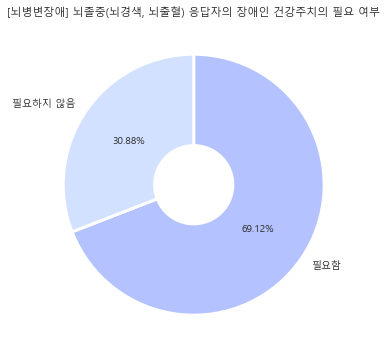

In [60]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6, 6)

ratios = [329, 147]
labels=['필요함', '필요하지 않음']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

plt.pie(ratios, labels = labels, colors=colors, startangle = 90, counterclock=False, wedgeprops=wedgeprops, autopct='%0.2f%%')
ax.set_title('[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 장애인 건강주치의 필요 여부', size=11)

# plt.savefig("pyvisual/뇌병변장애/뇌졸중/[뇌병변장애] 뇌졸중(뇌경색, 뇌출혈) 응답자의 장애인 건강주치의 필요 여부.png", dpi=300)
plt.show()

### '건강주치의'에게 받는 보건/의료서비스 중 필요하다고 생각하는 것

In [12]:
stroke_service = df.loc[df['주된 진단명(1)'] == 2].loc[df['건강주치의 필요']==1][['건강주치의_필요서비스1', '건강주치의_필요서비스2']]
stroke_service

,건강주치의_필요서비스1,건강주치의_필요서비스2
13,3,2
15,2,3
85,2,3
118,3,2
119,3,2
...,...,...
6455,2,1
6474,2,1
6481,4,5
6494,1,2


In [13]:
stroke_service_g = stroke_service.groupby(['건강주치의_필요서비스1', '건강주치의_필요서비스2'])[['건강주치의_필요서비스1']].count().add_suffix('_Count').reset_index()
stroke_service_g.head()

,건강주치의_필요서비스1,건강주치의_필요서비스2,건강주치의_필요서비스1_Count
0,1,0,9
1,1,2,40
2,1,3,13
3,1,4,3
4,1,6,7


In [14]:
pivot_df1 = stroke_service_g.pivot('건강주치의_필요서비스2', '건강주치의_필요서비스1', '건강주치의_필요서비스1_Count')
pivot_df1.fillna(0, inplace=True)
# pivot_df.astype('int')
pivot_df1

건강주치의_필요서비스1,1,2,3,4,5,6
건강주치의_필요서비스2,,,,,,
0,9.0,9.0,10.0,0.0,0.0,3.0
1,0.0,28.0,12.0,0.0,0.0,4.0
2,40.0,0.0,48.0,1.0,1.0,5.0
3,13.0,52.0,0.0,1.0,0.0,1.0
4,3.0,15.0,10.0,0.0,0.0,2.0
5,0.0,6.0,3.0,4.0,0.0,0.0
6,7.0,29.0,12.0,1.0,0.0,0.0


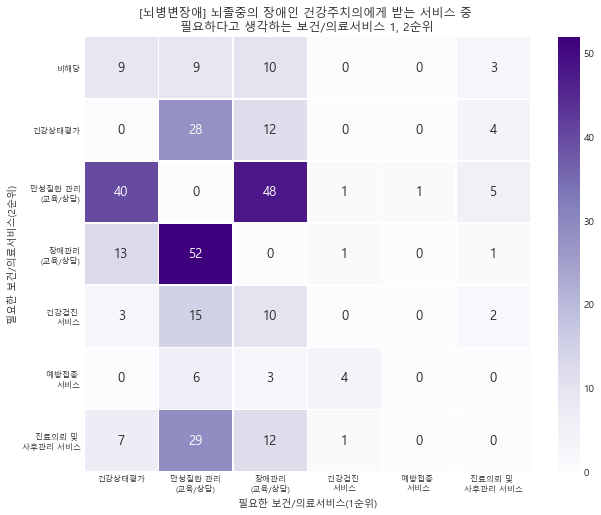

In [61]:
x_axis_labels = ['건강상태평가', '만성질환 관리\n(교육/상담)', '장애관리\n(교육/상담)', 
                 '건강검진 \n서비스', '예방접종 \n서비스', '진료의뢰 및 \n사후관리 서비스'] # 1순위
y_axis_labels = ['비해당', '건강상태평가', '만성질환 관리\n(교육/상담)', '장애관리\n(교육/상담)', 
                 '건강검진 \n서비스', '예방접종 \n서비스', '진료의뢰 및 \n사후관리 서비스'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

sns.heatmap(pivot_df1, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 13},
           xticklabels = x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title("[뇌병변장애] 뇌졸중의 장애인 건강주치의에게 받는 서비스 중 \n필요하다고 생각하는 보건/의료서비스 1, 2순위", size = 12)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 0)
ax.set_xlabel('필요한 보건/의료서비스(1순위)', size = 10)
ax.set_ylabel('필요한 보건/의료서비스(2순위)', size = 10)
# plt.gcf().subplots_adjust(left=0.18)

# plt.savefig("pyvisual/뇌병변장애/뇌졸중/[뇌병변장애] 뇌졸중의 장애인 건강주치의에게 받는 서비스 중 필요하다고 생각하는 보건, 의료서비스 1, 2순위.png", dpi=300)
plt.show()

### 건강주치의가 필요하지 않는 이유

In [3]:
not_need1 = pd.DataFrame(df.loc[df['주된 진단명(1)'] == 2].loc[df['건강주치의 필요']==2][['건강주치의 불필요한 이유']].value_counts()).reset_index()
not_need1

,건강주치의 불필요한 이유,0
0,1,88
1,3,41
2,2,15
3,4,2
4,5,1


In [4]:
not_need1['pct'] = round(not_need1[0]/not_need1[0].sum()*100, 2)
not_need1

,건강주치의 불필요한 이유,0,pct
0,1,88,59.86
1,3,41,27.89
2,2,15,10.20
3,4,2,1.36
4,5,1,0.68


In [5]:
col_lst1 = not_need1['건강주치의 불필요한 이유'].tolist()
col_lst1

[1, 3, 2, 4, 5]

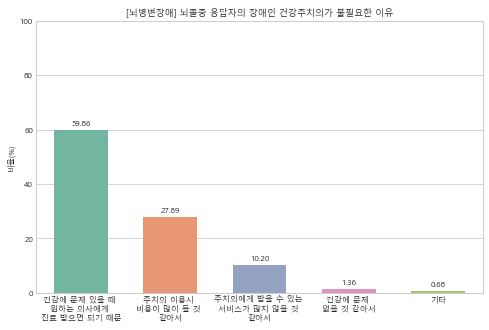

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)


splot = sns.barplot(data = not_need1, x = '건강주치의 불필요한 이유', y = 'pct', order=col_lst1, palette='Set2')
ax.set_title('[뇌병변장애] 뇌졸중 응답자의 장애인 건강주치의가 불필요한 이유', size=9)
ax.set_ylabel('비율(%)', size=8)
ax.set_xlabel('')
ax.set_xticklabels(['건강에 문제 있을 때 \n원하는 의사에게 \n진료 받으면 되기 때문', '주치의 이용시 \n비용이 많이 들 것 \n같아서', 
                    '주치의에게 받을 수 있는 \n서비스가 많지 않을 것 \n같아서', '건강에 문제 \n없을 것 같아서', '기타'], size = 8)
ax.set_ylim([0, 100]) # y축 눈금 범위 설정
ax.tick_params(axis='both', labelsize = 8) # x축 눈금 크기 조절

### 비율(%) 라벨링 하기
for bar in splot.patches: # value label 생성
    ax.annotate("{:0.2f}".format(float(bar.get_height())), # value 값 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 6),
                   textcoords='offset points')

## seaborn 막대 그래프 너비 설정
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .6)
    
plt.savefig("pyvisual/뇌병변장애/뇌졸중/[뇌병변장애] 뇌졸중 응답자의 장애인 건강주치의가 불필요한 이유.png", dpi=300)
plt.show()

## 뇌손상
### '나의 건강관리의사' 필요 여부

In [89]:
df.loc[df['주된 진단명(1)'] == 3][['건강주치의 필요']].value_counts()

건강주치의 필요
1           52
2           26
dtype: int64

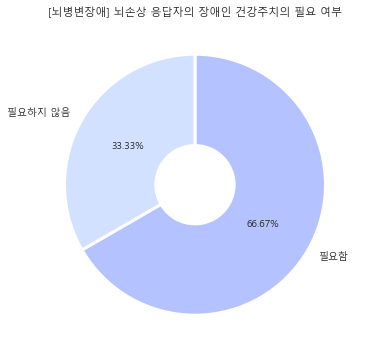

In [91]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6, 6)

ratios = [52, 26]
labels=['필요함', '필요하지 않음']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

plt.pie(ratios, labels = labels, colors=colors, startangle = 90, counterclock=False, wedgeprops=wedgeprops, autopct='%0.2f%%')
ax.set_title('[뇌병변장애] 뇌손상 응답자의 장애인 건강주치의 필요 여부', size=11)

# plt.savefig("pyvisual/뇌병변장애/뇌손상/[뇌병변장애] 뇌손상 응답자의 장애인 건강주치의 필요 여부.png", dpi=300)
plt.show()

### '건강주치의'에게 받는 보건/의료서비스 중 필요하다고 생각하는 것

In [93]:
brain_service = df.loc[df['주된 진단명(1)'] == 3].loc[df['건강주치의 필요']==1][['건강주치의_필요서비스1', '건강주치의_필요서비스2']]
brain_service

,건강주치의_필요서비스1,건강주치의_필요서비스2
228,3,6
229,3,2
236,1,6
238,3,1
239,1,2
243,3,2
335,3,1
380,2,0
414,3,0
446,3,6


In [94]:
brain_service_g = brain_service.groupby(['건강주치의_필요서비스1', '건강주치의_필요서비스2'])[['건강주치의_필요서비스1']].count().add_suffix('_Count').reset_index()
brain_service_g.head()

,건강주치의_필요서비스1,건강주치의_필요서비스2,건강주치의_필요서비스1_Count
0,1,2,3
1,1,3,3
2,1,5,1
3,1,6,2
4,2,0,1


In [95]:
pivot_df2 = brain_service_g.pivot('건강주치의_필요서비스2', '건강주치의_필요서비스1', '건강주치의_필요서비스1_Count')
pivot_df2.fillna(0, inplace=True)
# pivot_df.astype('int')
pivot_df2

건강주치의_필요서비스1,1,2,3,4,5
건강주치의_필요서비스2,,,,,
0,0.0,1.0,3.0,0.0,0.0
1,0.0,2.0,8.0,0.0,0.0
2,3.0,0.0,7.0,1.0,0.0
3,3.0,6.0,0.0,0.0,2.0
4,0.0,1.0,0.0,0.0,0.0
5,1.0,1.0,1.0,0.0,0.0
6,2.0,3.0,7.0,0.0,0.0


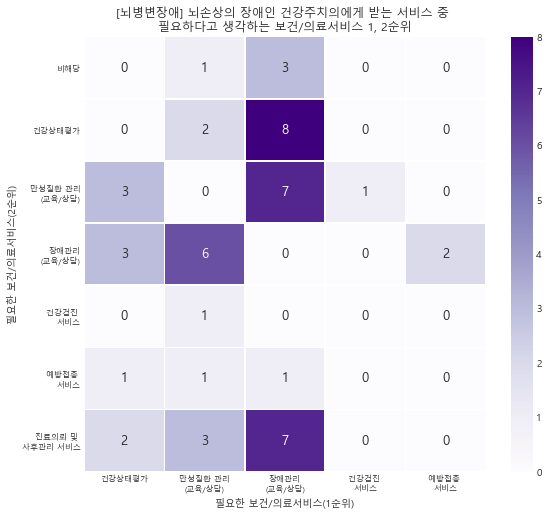

In [98]:
x_axis_labels = ['건강상태평가', '만성질환 관리\n(교육/상담)', '장애관리\n(교육/상담)', 
                 '건강검진 \n서비스', '예방접종 \n서비스'] # 1순위
y_axis_labels = ['비해당', '건강상태평가', '만성질환 관리\n(교육/상담)', '장애관리\n(교육/상담)', 
                 '건강검진 \n서비스', '예방접종 \n서비스', '진료의뢰 및 \n사후관리 서비스'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(9, 8)

sns.heatmap(pivot_df2, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 13},
           xticklabels = x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title("[뇌병변장애] 뇌손상의 장애인 건강주치의에게 받는 서비스 중 \n필요하다고 생각하는 보건/의료서비스 1, 2순위", size = 12)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 0)
ax.set_xlabel('필요한 보건/의료서비스(1순위)', size = 10)
ax.set_ylabel('필요한 보건/의료서비스(2순위)', size = 10)
# plt.gcf().subplots_adjust(left=0.18)

# plt.savefig("pyvisual/뇌병변장애/뇌손상/[뇌병변장애] 뇌손상의 장애인 건강주치의에게 받는 서비스 중 필요하다고 생각하는 보건, 의료서비스 1, 2순위.png", dpi=300)
plt.show()

### 건강주치의가 필요하지 않는 이유

In [9]:
not_need2 = pd.DataFrame(df.loc[df['주된 진단명(1)'] == 3].loc[df['건강주치의 필요']==2][['건강주치의 불필요한 이유']].value_counts()).reset_index()
not_need2

,건강주치의 불필요한 이유,0
0,1,11
1,3,7
2,2,6
3,4,1
4,5,1


In [10]:
not_need2['pct'] = round(not_need2[0]/not_need2[0].sum()*100, 2)
not_need2

,건강주치의 불필요한 이유,0,pct
0,1,11,42.31
1,3,7,26.92
2,2,6,23.08
3,4,1,3.85
4,5,1,3.85


In [11]:
col_lst2 = not_need2['건강주치의 불필요한 이유'].tolist()
col_lst2

[1, 3, 2, 4, 5]

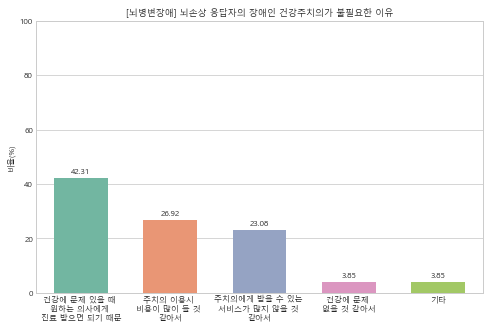

In [27]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 5)


splot = sns.barplot(data = not_need2, x = '건강주치의 불필요한 이유', y = 'pct', order=col_lst2, palette='Set2')
ax.set_title('[뇌병변장애] 뇌손상 응답자의 장애인 건강주치의가 불필요한 이유', size = 9)
ax.set_ylabel('비율(%)', size=8)
ax.set_xlabel('')
ax.set_xticklabels(['건강에 문제 있을 때 \n원하는 의사에게 \n진료 받으면 되기 때문', '주치의 이용시 \n비용이 많이 들 것 \n같아서', 
                    '주치의에게 받을 수 있는 \n서비스가 많지 않을 것 \n같아서', '건강에 문제 \n없을 것 같아서', '기타'], size = 8)
ax.set_ylim([0, 100]) # y축 눈금 범위 설정
ax.tick_params(axis='both', labelsize = 8) # x축 눈금 크기 조절

### 비율(%) 라벨링 하기
for bar in splot.patches: # value label 생성
    ax.annotate("{:0.2f}".format(float(bar.get_height())), # value 값 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 6),
                   textcoords='offset points')

## seaborn 막대 그래프 너비 설정
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .6)
    
# plt.savefig("pyvisual/뇌병변장애/뇌손상/[뇌병변장애] 뇌손상 응답자의 장애인 건강주치의가 불필요한 이유.png", dpi=300)
plt.show()

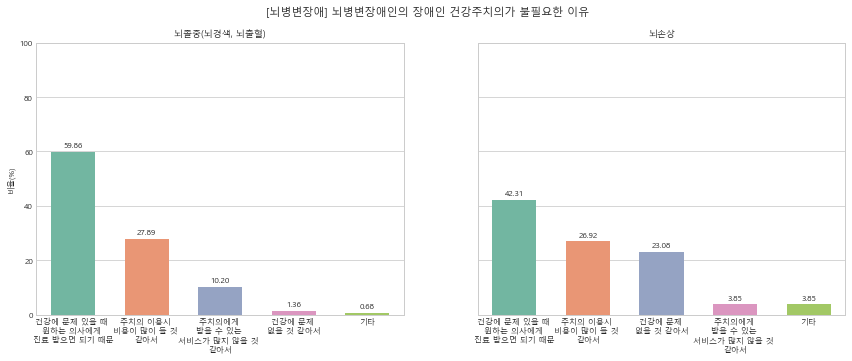

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(14.5, 5)

splot1 = sns.barplot(data = not_need1, x = '건강주치의 불필요한 이유', y = 'pct', order=col_lst2, palette='Set2', ax=ax1)
ax1.set_title('뇌졸중(뇌경색, 뇌출혈)', size = 9)
ax1.set_ylabel('비율(%)', size=8)
ax1.set_xlabel('')
ax1.set_xticklabels(['건강에 문제 있을 때 \n원하는 의사에게 \n진료 받으면 되기 때문', '주치의 이용시 \n비용이 많이 들 것 \n같아서', 
                     '주치의에게 \n받을 수 있는 \n서비스가 많지 않을 것 \n같아서', '건강에 문제 \n없을 것 같아서', '기타'], size = 8)
ax1.set_ylim([0, 100]) # y축 눈금 범위 설정
ax1.tick_params(axis='both', labelsize = 8) # x축 눈금 크기 조절

### 비율(%) 라벨링 하기
for bar in splot1.patches: # value label 생성
    ax1.annotate("{:0.2f}".format(float(bar.get_height())), # value 값 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 6),
                   textcoords='offset points')

splot2 = sns.barplot(data = not_need2, x = '건강주치의 불필요한 이유', y = 'pct', order=col_lst2, palette='Set2', ax=ax2)
ax2.set_title('뇌손상', size = 9)
ax2.set_ylabel('', size=8)
ax2.set_xlabel('')
ax2.set_xticklabels(['건강에 문제 있을 때 \n원하는 의사에게 \n진료 받으면 되기 때문', '주치의 이용시 \n비용이 많이 들 것 \n같아서', 
                    '건강에 문제 \n없을 것 같아서', '주치의에게 \n받을 수 있는 \n서비스가 많지 않을 것 \n같아서', '기타'], size = 8)
ax2.set_ylim([0, 100]) # y축 눈금 범위 설정
ax2.tick_params(axis='both', labelsize = 8) # x축 눈금 크기 조절

### 비율(%) 라벨링 하기
for bar in splot2.patches: # value label 생성
    ax2.annotate("{:0.2f}".format(float(bar.get_height())), # value 값 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 6),
                   textcoords='offset points')
 
## seaborn 막대 그래프 너비 설정
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax1, .6)
change_width(ax2, .6)

plt.suptitle('[뇌병변장애] 뇌병변장애인의 장애인 건강주치의가 불필요한 이유', size = 11)
plt.savefig("pyvisual/뇌병변장애/종합/[뇌병변장애] 뇌병변장애인의 건강주치의가 불필요한 이유.png", dpi=300)
plt.show()

---
### 건강수준 향상을 위해 정부가 더 강화해야 할 보건의료 및 건강 서비스
#### 뇌졸중(뇌경색, 뇌출혈)

In [12]:
stroke_force = df.loc[df['주된 진단명(1)'] == 2][['정부(사회) 강화할 보건의료서비스1', '정부(사회) 강화할 보건의료서비스2']]
stroke_force.head()

,정부(사회) 강화할 보건의료서비스1,정부(사회) 강화할 보건의료서비스2
13,3,2
15,2,3
42,2,3
85,3,2
118,3,2


In [13]:
stroke_force_g = stroke_force.groupby(['정부(사회) 강화할 보건의료서비스1', '정부(사회) 강화할 보건의료서비스2'])[['정부(사회) 강화할 보건의료서비스1']].count().add_suffix('_Count').reset_index()
stroke_force_g.head()

,정부(사회) 강화할 보건의료서비스1,정부(사회) 강화할 보건의료서비스2,정부(사회) 강화할 보건의료서비스1_Count
0,1,0,11
1,1,2,43
2,1,3,32
3,1,4,14
4,1,5,6


In [14]:
pivot_df1 = stroke_force_g.pivot('정부(사회) 강화할 보건의료서비스2', '정부(사회) 강화할 보건의료서비스1', '정부(사회) 강화할 보건의료서비스1_Count')
pivot_df1.fillna(0, inplace=True)
# pivot_df1.astype('int')
pivot_df1

정부(사회) 강화할 보건의료서비스1,1,2,3,4,5,6,7,8,9
정부(사회) 강화할 보건의료서비스2,,,,,,,,,
0,11.0,5.0,18.0,2.0,0.0,1.0,2.0,0.0,0.0
1,0.0,23.0,31.0,2.0,0.0,0.0,0.0,1.0,0.0
2,43.0,0.0,76.0,8.0,3.0,2.0,1.0,0.0,0.0
3,32.0,78.0,0.0,2.0,1.0,0.0,5.0,0.0,1.0
4,14.0,15.0,14.0,0.0,2.0,1.0,0.0,1.0,0.0
5,6.0,2.0,5.0,8.0,0.0,0.0,0.0,0.0,0.0
6,1.0,3.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0
7,3.0,11.0,12.0,1.0,1.0,0.0,0.0,0.0,0.0
8,1.0,5.0,9.0,1.0,0.0,0.0,1.0,0.0,0.0


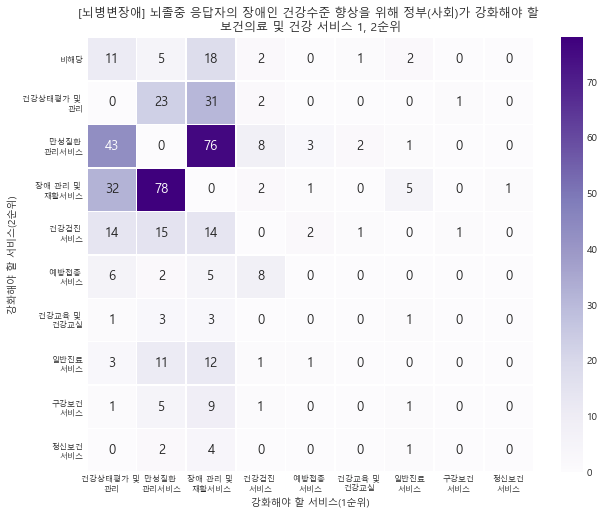

In [21]:
x_axis_labels = ['건강상태평가 및 \n관리', '만성질환 \n관리서비스', '장애 관리 및 \n재활서비스', '건강검진 \n서비스', '예방접종 \n서비스',
                '건강교육 및 \n건강교실', '일반진료\n서비스', '구강보건\n서비스', '정신보건\n서비스'] # 1순위
y_axis_labels = ['비해당', '건강상태평가 및 \n관리', '만성질환 \n관리서비스', '장애 관리 및 \n재활서비스', '건강검진 \n서비스', '예방접종 \n서비스',
                '건강교육 및 \n건강교실', '일반진료\n서비스', '구강보건\n서비스', '정신보건\n서비스'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

sns.heatmap(pivot_df1, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 13},
           xticklabels = x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title("[뇌병변장애] 뇌졸중 응답자의 장애인 건강수준 향상을 위해 정부(사회)가 강화해야 할 \n보건의료 및 건강 서비스 1, 2순위", size = 12)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 0)
ax.set_xlabel('강화해야 할 서비스(1순위)', size = 10)
ax.set_ylabel('강화해야 할 서비스(2순위)', size = 10)
# plt.gcf().subplots_adjust(left=0.18)

# plt.savefig("pyvisual/뇌병변장애/뇌졸중/[뇌병변장애] 뇌졸중 응답자의 장애인 건강수준 향상을 위해 정부(사회)가 강화해야 할 보건의료 및 건강 서비스 1, 2순위.png", dpi=300)
plt.show()

---
#### 뇌손상

In [24]:
brain_force = df.loc[df['주된 진단명(1)'] == 3][['정부(사회) 강화할 보건의료서비스1', '정부(사회) 강화할 보건의료서비스2']]
brain_force.head()

,정부(사회) 강화할 보건의료서비스1,정부(사회) 강화할 보건의료서비스2
228,3,2
229,3,2
236,7,1
238,3,8
239,3,1


In [30]:
brain_force_g = brain_force.groupby(['정부(사회) 강화할 보건의료서비스1', '정부(사회) 강화할 보건의료서비스2'])[['정부(사회) 강화할 보건의료서비스1']].count().add_suffix('_Count').reset_index()
brain_force_g.head()

,정부(사회) 강화할 보건의료서비스1,정부(사회) 강화할 보건의료서비스2,정부(사회) 강화할 보건의료서비스1_Count
0,1,0,1
1,1,2,6
2,1,3,6
3,1,4,1
4,2,0,2


In [31]:
pivot_df2 = brain_force_g.pivot('정부(사회) 강화할 보건의료서비스2', '정부(사회) 강화할 보건의료서비스1', '정부(사회) 강화할 보건의료서비스1_Count')
pivot_df2.fillna(0, inplace=True)
# pivot_df1.astype('int')
pivot_df2

정부(사회) 강화할 보건의료서비스1,1,2,3,4,6,7,8,9
정부(사회) 강화할 보건의료서비스2,,,,,,,,
0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0
1,0.0,4.0,10.0,0.0,0.0,1.0,0.0,0.0
2,6.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0
3,6.0,10.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0
8,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0


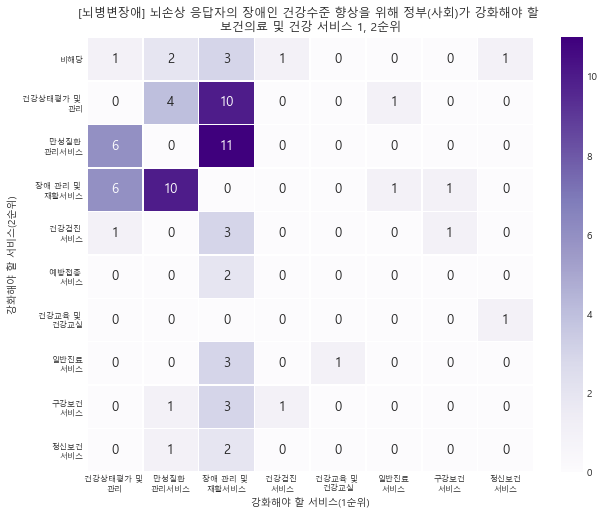

In [33]:
x_axis_labels = ['건강상태평가 및 \n관리', '만성질환 \n관리서비스', '장애 관리 및 \n재활서비스', '건강검진 \n서비스',
                '건강교육 및 \n건강교실', '일반진료\n서비스', '구강보건\n서비스', '정신보건\n서비스'] # 1순위
y_axis_labels = ['비해당', '건강상태평가 및 \n관리', '만성질환 \n관리서비스', '장애 관리 및 \n재활서비스', '건강검진 \n서비스', '예방접종 \n서비스',
                '건강교육 및 \n건강교실', '일반진료\n서비스', '구강보건\n서비스', '정신보건\n서비스'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

sns.heatmap(pivot_df2, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 13},
           xticklabels = x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title("[뇌병변장애] 뇌손상 응답자의 장애인 건강수준 향상을 위해 정부(사회)가 강화해야 할 \n보건의료 및 건강 서비스 1, 2순위", size = 12)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 0)
ax.set_xlabel('강화해야 할 서비스(1순위)', size = 10)
ax.set_ylabel('강화해야 할 서비스(2순위)', size = 10)
# plt.gcf().subplots_adjust(left=0.18)

plt.savefig("pyvisual/뇌병변장애/뇌손상/[뇌병변장애] 뇌손상 응답자의 장애인 건강수준 향상을 위해 정부(사회)가 강화해야 할 보건의료 및 건강 서비스 1, 2순위.png", dpi=300)
plt.show()